In [1]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 107.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.1 MB/s eta 0:00:00


In [2]:
# Core packages for general use throughout the notebook.
import random
import warnings
import time
import datetime
import ssl

# Basic packages for EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.
import string
import re

# Libraries for text preprocessing using NLTK.
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Packages for text vectorization.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Packages for topic modeling.
from sklearn.decomposition import LatentDirichletAllocation, NMF

# sklearn packages for model evaluation.
from sklearn.metrics import f1_score, accuracy_score

# Packages for word clouds and NER.
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy

# PyTorch and HuggingFace Transformers for deep learning.
import torch
from transformers import (BertTokenizer, BertForSequenceClassification, AdamW,
                          BertConfig, get_linear_schedule_with_warmup)
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

# Keras packages for deep learning.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.initializers import Constant
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# For customizing our plots.
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Setting some options for general use.
ssl._create_default_https_context = ssl._create_unverified_context
import nltk
from nltk.corpus import stopwords
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('stopwords')
stop = set(stopwords.words('english'))
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')

# Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# tweet= pd.read_csv('/Users/yankesswang/Downloads/nlp-getting-started/train.csv')
# test=pd.read_csv('/Users/yankesswang/Downloads/nlp-getting-started/test.csv')
# tweet.head()

In [5]:
# Loading the train and test data for visualization & exploration.
tweet = pd.read_csv('/content/drive/My Drive/train.csv')
test =pd.read_csv('/content/drive/My Drive/test.csv')

In [6]:
# from google.colab import files
# file = files.upload()

In [7]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
tweet0 = tweet[tweet['target'] == 0]
tweet1 = tweet[tweet['target'] == 1]

In [9]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
print('There are {} rows and {} columns in tweet'.format(tweet.shape[0],tweet.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in tweet
There are 3263 rows and 4 columns in test


## Different tweet of target

In [11]:
print('Disatser Tweet\n')
for i in range(10):
    print(f'Topic {i+1}: ',tweet1.iloc[i]['text'])


Disatser Tweet

Topic 1:  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Topic 2:  Forest fire near La Ronge Sask. Canada
Topic 3:  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Topic 4:  13,000 people receive #wildfires evacuation orders in California 
Topic 5:  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
Topic 6:  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
Topic 7:  #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
Topic 8:  I'm on top of the hill and I can see a fire in the woods...
Topic 9:  There's an emergency evacuation happening now in the building across the street
Topic 10:  I'm afraid that the tornado is coming to our area...


In [12]:
print('Non Disatser Tweet\n')
for i in range(10):
    print(f'Topic {i+1}: ',tweet0.iloc[i]['text'])


Non Disatser Tweet

Topic 1:  What's up man?
Topic 2:  I love fruits
Topic 3:  Summer is lovely
Topic 4:  My car is so fast
Topic 5:  What a goooooooaaaaaal!!!!!!
Topic 6:  this is ridiculous....
Topic 7:  London is cool ;)
Topic 8:  Love skiing
Topic 9:  What a wonderful day!
Topic 10:  LOOOOOOL


# Displaying target distribution.

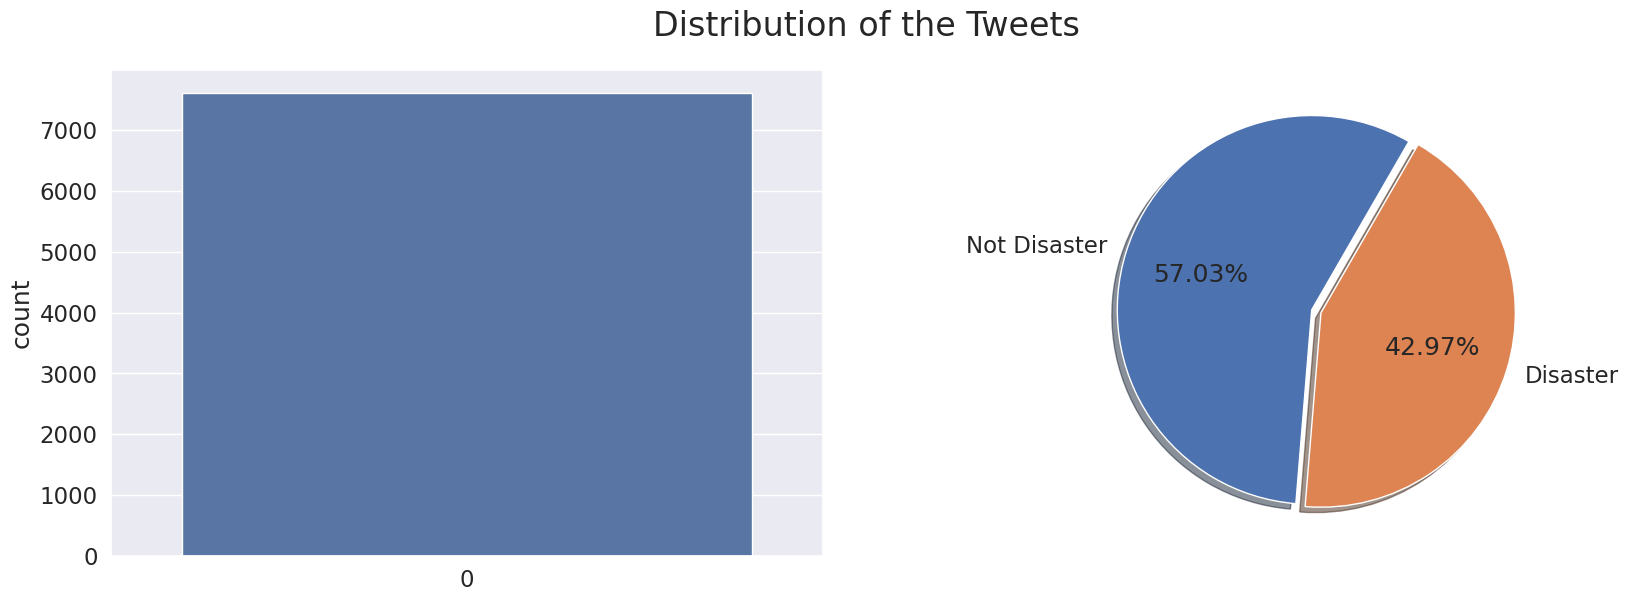

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(tweet['target'], ax=axes[0])
axes[1].pie(tweet['target'].value_counts(),
            labels=['Not Disaster', 'Disaster'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Distribution of the Tweets', fontsize=24)
plt.show()

關於 target 列的分布：

總數：7000筆tweet

類別0（非災害）占比約為57.03%
類別1（災害）占比約為42.97%

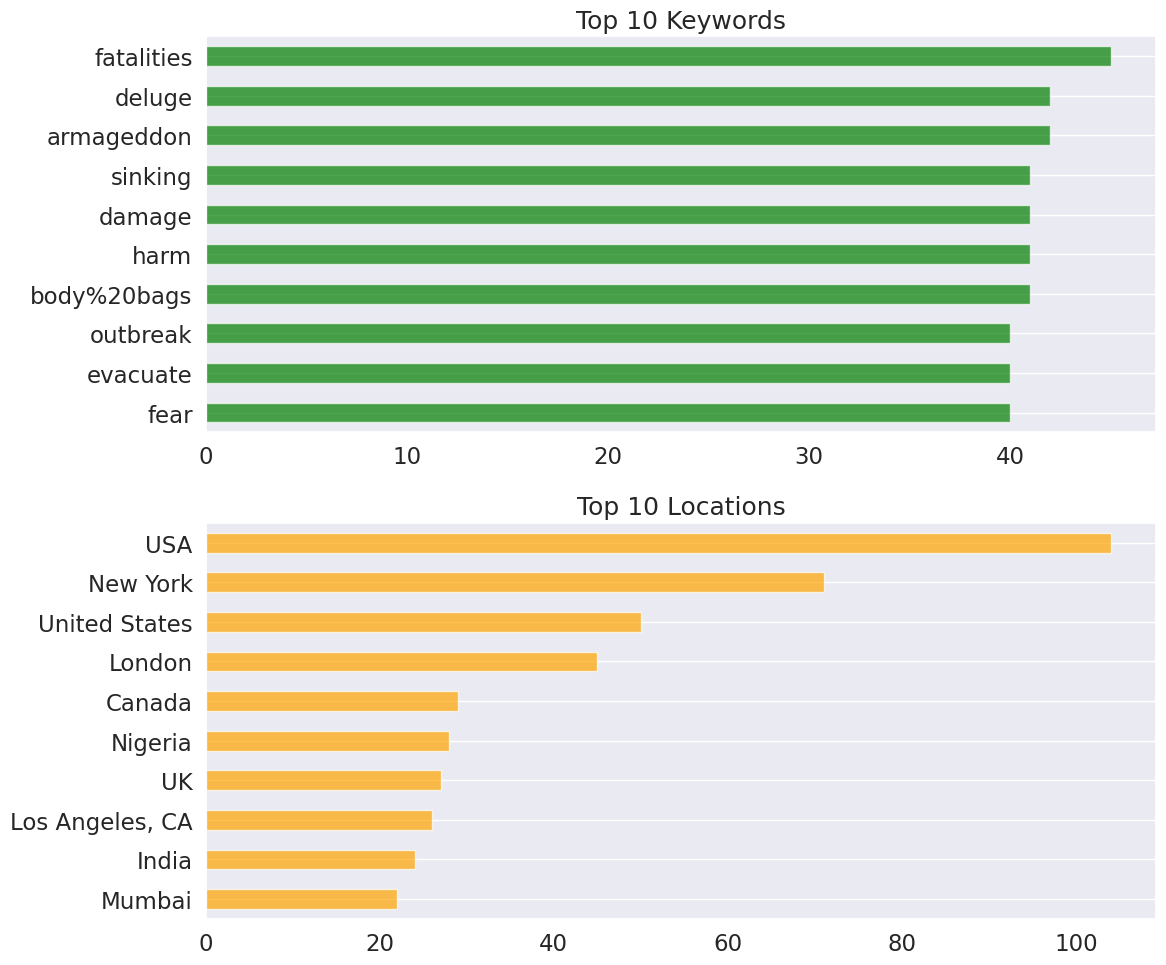

In [14]:
# Getting the top 10 most common keywords and locations
top_keywords = tweet['keyword'].value_counts().head(10)
top_locations = tweet['location'].value_counts().head(10)

# Plotting the top 10 keywords and locations
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

top_keywords.plot(kind='barh', ax=axes[0], color='green', alpha=0.7)
axes[0].set_title('Top 10 Keywords')
axes[0].invert_yaxis()
axes[0].grid(axis='x')

top_locations.plot(kind='barh', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title('Top 10 Locations')
axes[1].invert_yaxis()
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()

Top 10 Keywords:
"fatalities"、"armageddon"、"harm" 和 "siren" 等等是最常見的關鍵詞。

Top 10 Locations:
"USA"、"New York"、"United States" 和 "London" 等是最常被提及的地點。

# Top 20 Locations for all tweets

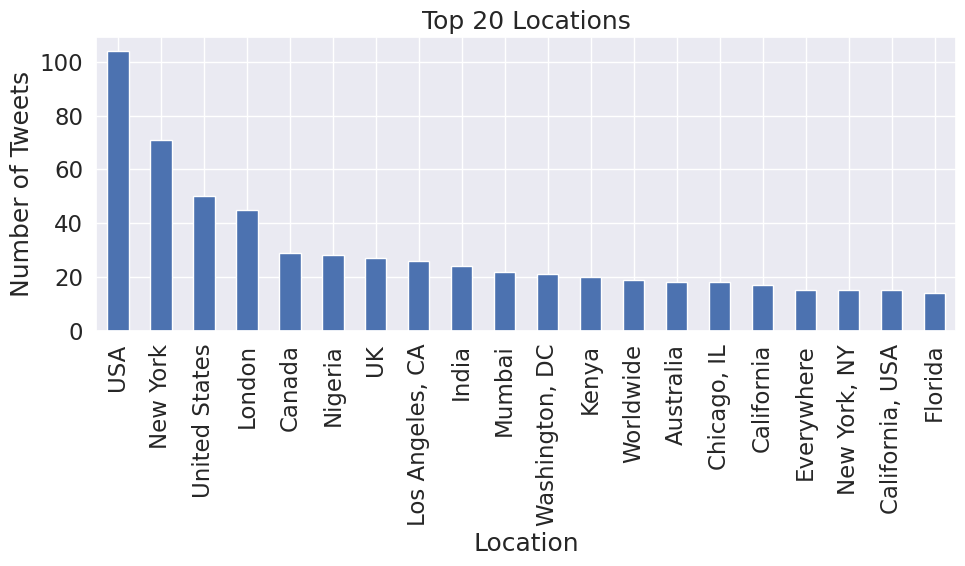

In [15]:
location = tweet['location'].value_counts()
location.reset_index()
location = location[:20]

location.plot(kind= 'bar', figsize=(10,6))
plt.title('Top 20 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()

# Top 20 Locations for tweets 0 and 1

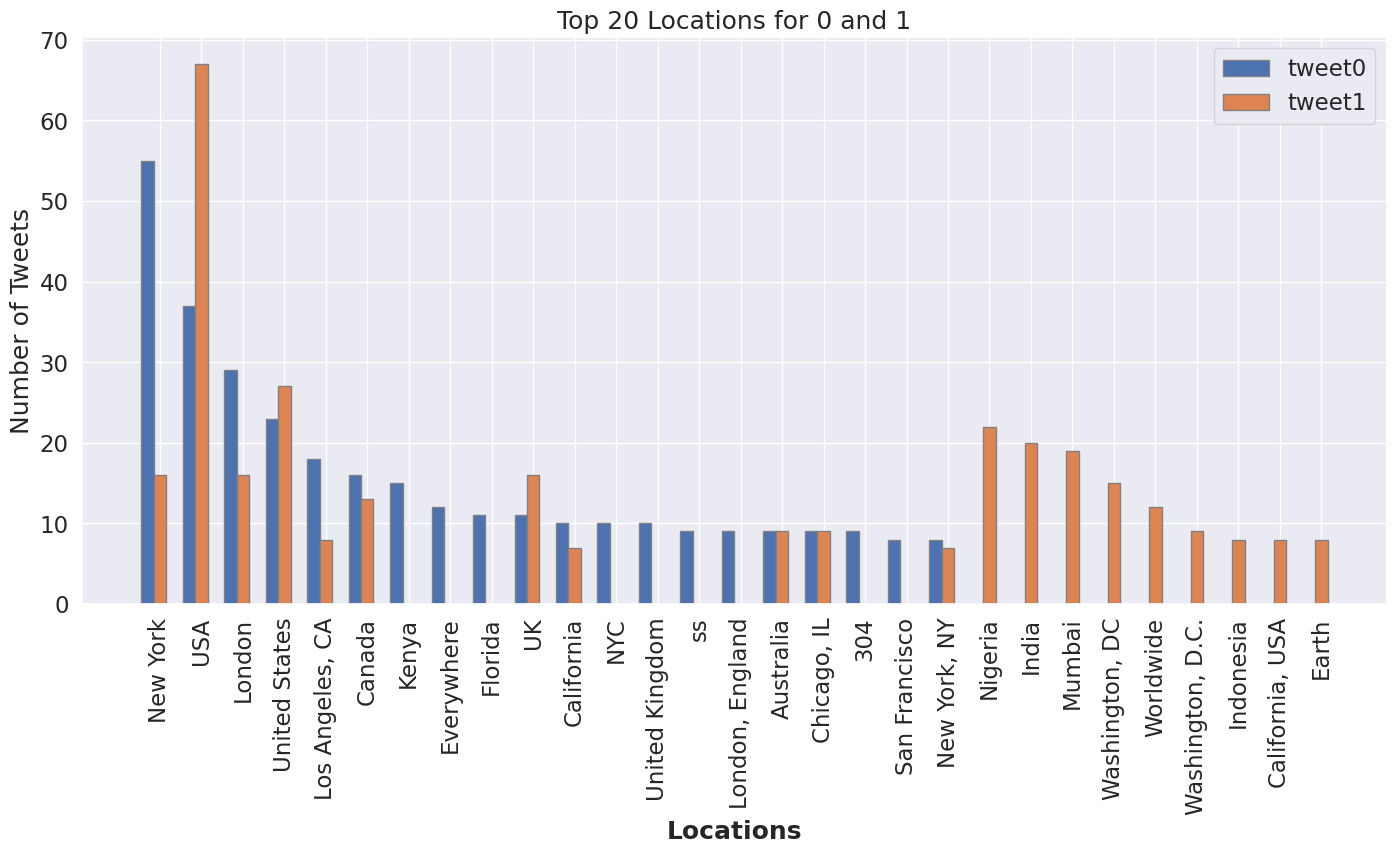

In [16]:
location0 = tweet0['location'].value_counts()[:20].reset_index()
location1 = tweet1['location'].value_counts()[:20].reset_index()


merged = pd.merge(location0, location1, on='index', how='outer').fillna(0)
barWidth = 0.3
r1 = range(len(merged))
r2 = [x + barWidth for x in r1]


plt.figure(figsize=(15,7))
plt.bar(r1, merged['location_x'], width=barWidth, edgecolor='grey', label='tweet0')
plt.bar(r2, merged['location_y'], width=barWidth, edgecolor='grey', label='tweet1')

plt.title('Top 20 Locations for 0 and 1')
plt.xlabel('Locations', fontweight='bold')
plt.ylabel('Number of Tweets')

plt.xticks([r + barWidth for r in range(len(merged))], merged['index'], rotation=90)
plt.legend()
plt.show()

In [17]:
basic_stats = tweet.describe(include='all')
basic_stats

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


# # 清理字串

In [18]:
def clean_text(text):
    '''Clean text by performing a series of transformations:
        - Convert text to lowercase
        - Remove text inside square brackets
        - Remove URLs
        - Remove emojis
        - Remove HTML tags
        - Remove punctuations
        - Remove words containing numbers
    '''

    # Convert to lowercase
    text = str(text).lower()

    # Remove text inside square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove emojis
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove HTML tags
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    text = re.sub(html, '', text)

    # Remove punctuations
    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    return text


In [19]:
tweet['text_clean'] = tweet['text'].apply(clean_text)
tweet.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [20]:
test['text_clean'] = test['text'].apply(clean_text)
test.head()

,id,keyword,location,text,text_clean
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan


# Data Preprocessing

In [21]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words += more_stopwords
stemmer = nltk.SnowballStemmer("english")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def preprocess_data(text):
    # 1. Tokenize the text
    tokens = word_tokenize(text)

    # 2. Convert to lowercase
    lower_tokens = [word.lower() for word in tokens]

    # 3. Remove stopwords
    stopwords_removed = [word for word in lower_tokens if word not in stop]

    # 4. Apply POS tagging
    pos_tags = nltk.pos_tag(stopwords_removed)

    # 5. Map POS tags to WordNet POS tags
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    wordnet_pos = [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in pos_tags]

    # 6. Lemmatize words based on their WordNet POS tags
    wnl = WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(word, tag) for word, tag in wordnet_pos]

    # Remove any stopwords that might still exist after lemmatization
    lemmatized = [word for word in lemmatized if word not in stop]

    # 7. Return the cleaned and lemmatized string
    return ' '.join(lemmatized)

tweet['text_clean'] = tweet['text_clean'].apply(preprocess_data)
tweet.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby alaska smoke wildfires pou...


In [22]:
test['text_clean'] = test['text_clean'].apply(preprocess_data)
test.head()

,id,keyword,location,text,text_clean
0,0,NaN,NaN,Just happened a terrible car crash,happen terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese flee across street...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse light spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


# Count Text

In [23]:
tweet['Character Count'] = tweet['text_clean'].apply(lambda x: len(str(x)))
test['Character Count'] = test['text_clean'].apply(lambda x: len(str(x)))

In [24]:
tweet["num_words"] = tweet['text_clean'].apply(lambda x: len(str(x).split()))
test["num_words"] = test['text_clean'].apply(lambda x: len(str(x).split()))

Text(0.5, 1.0, 'Number of characters in each class')

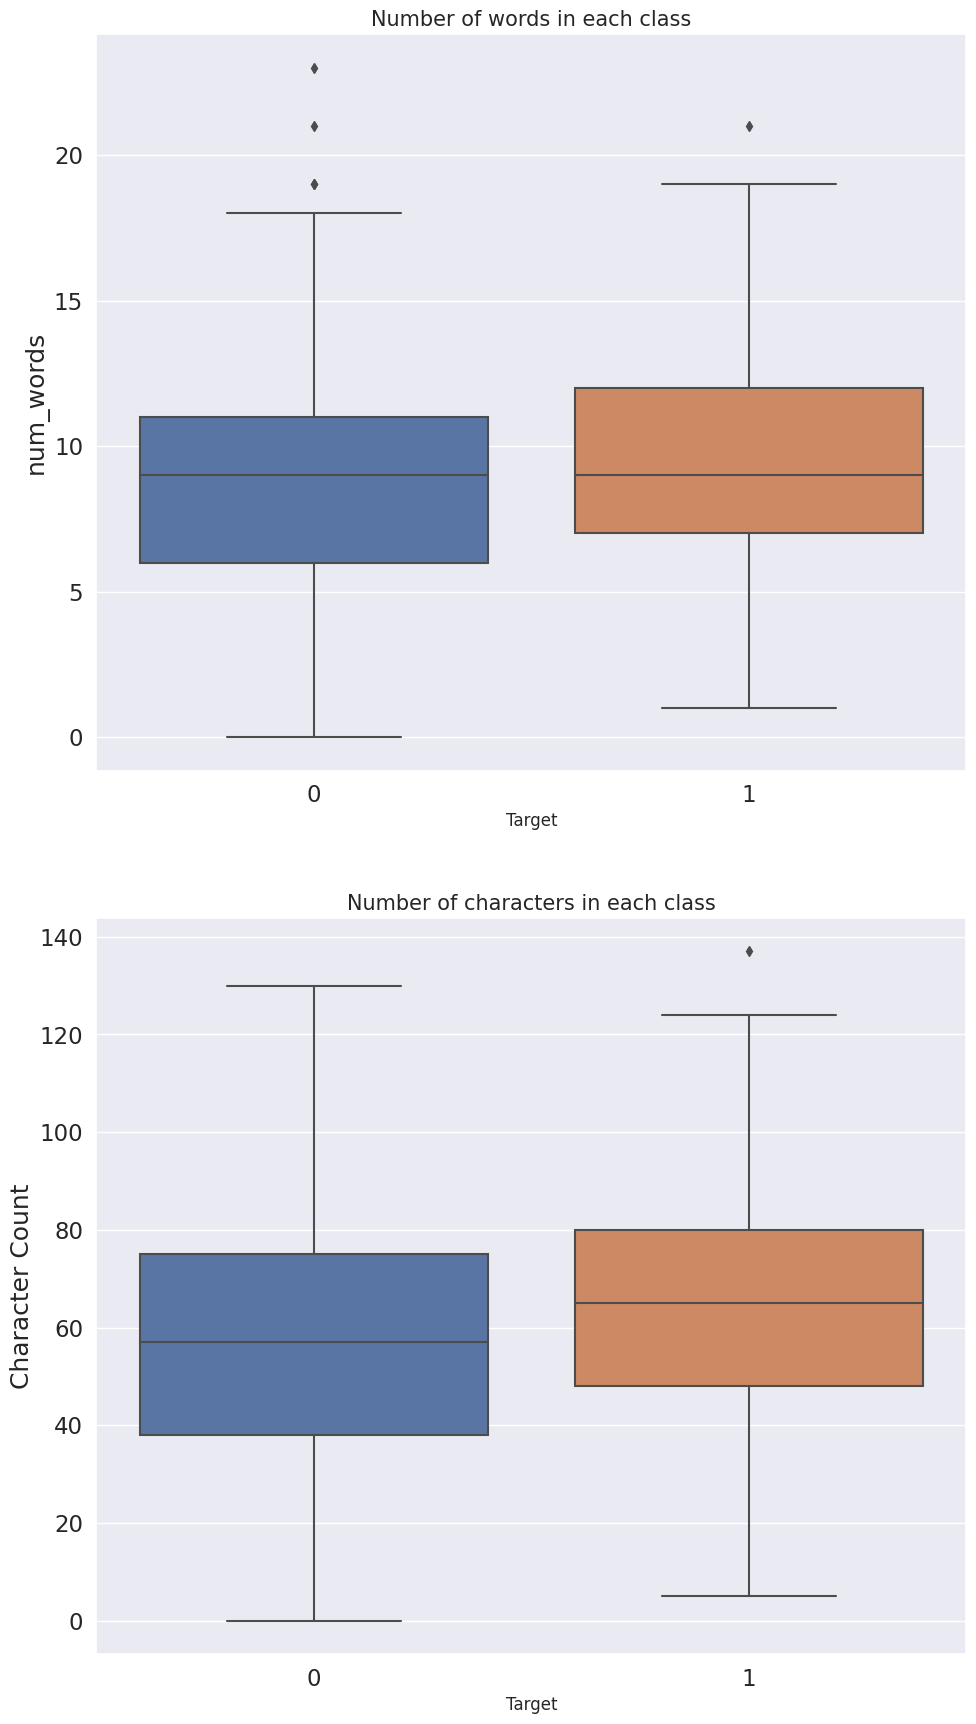

In [25]:
f, axes = plt.subplots(2, 1, figsize=(10,20))
sns.boxplot(x='target', y='num_words', data=tweet, ax=axes[0])
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.boxplot(x='target', y='Character Count', data=tweet, ax=axes[1])
axes[1].set_xlabel('Target', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

經過資料清洗後的text：

總字數落在50-70字之間，
總長度落在7-10之間

# Word Lengths

In [26]:
def plot_word_len_histogram(textno, textye):

    """A function for comparing average word length"""

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[1], color='#e74c3c')

    axes[0].set_xlabel('Word Length')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Length')
    axes[1].set_title('Disaster Tweets')

    fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
    fig.tight_layout()

In [27]:
tweet0 = tweet[tweet['target'] == 0]
tweet1 = tweet[tweet['target'] == 1]

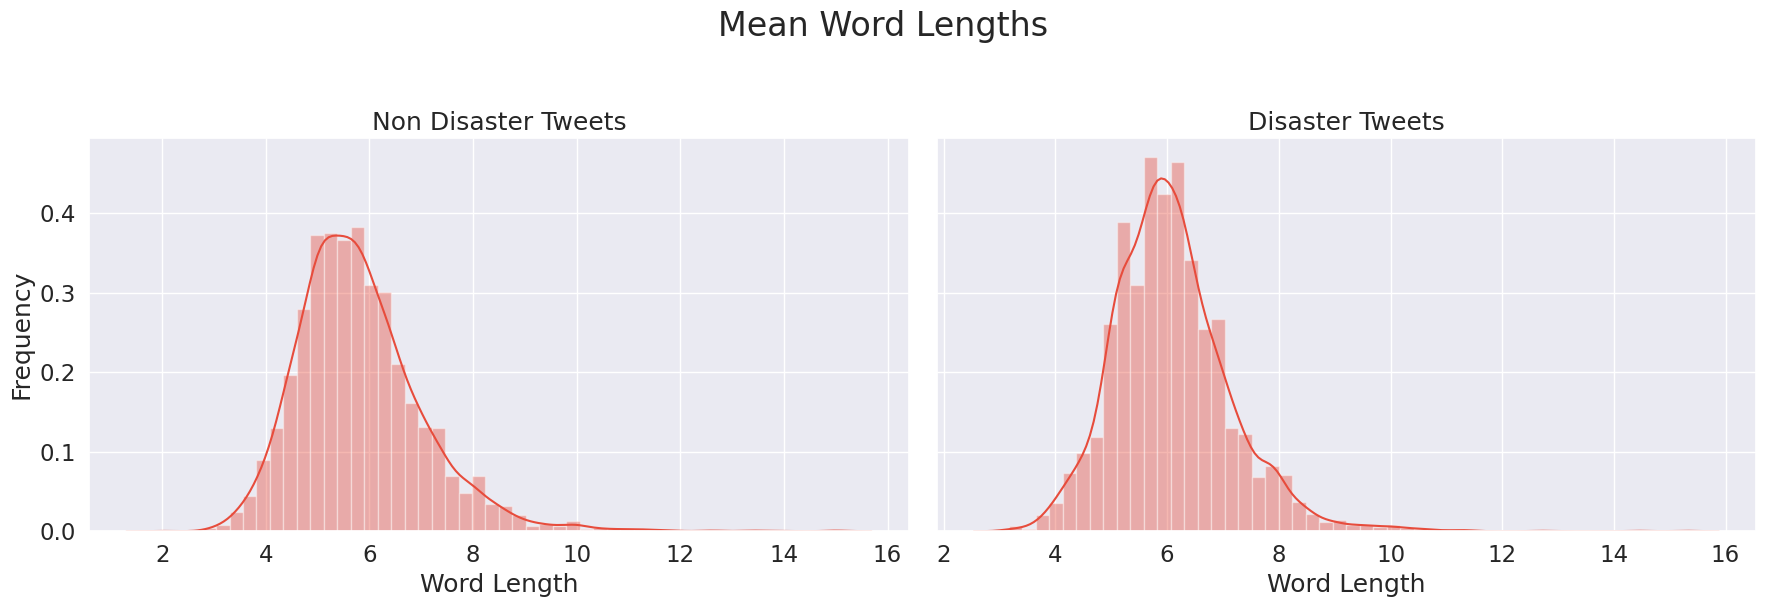

In [28]:
plot_word_len_histogram(tweet0['text_clean'],tweet1['text_clean'])

# Most Common Words

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 找出前二十個常見字
word_freq_target_0 = Counter(" ".join(tweet0['text_clean']).split())
word_freq_target_1 = Counter(" ".join(tweet1['text_clean']).split())

top_words_target_0 = word_freq_target_0.most_common(20)
top_words_target_1 = word_freq_target_1.most_common(20)

words_0, counts_0 = zip(*top_words_target_0)
words_1, counts_1 = zip(*top_words_target_1)

df_target_0 = pd.DataFrame({'Words': words_0, 'Frequency': counts_0})
df_target_1 = pd.DataFrame({'Words': words_1, 'Frequency': counts_1})

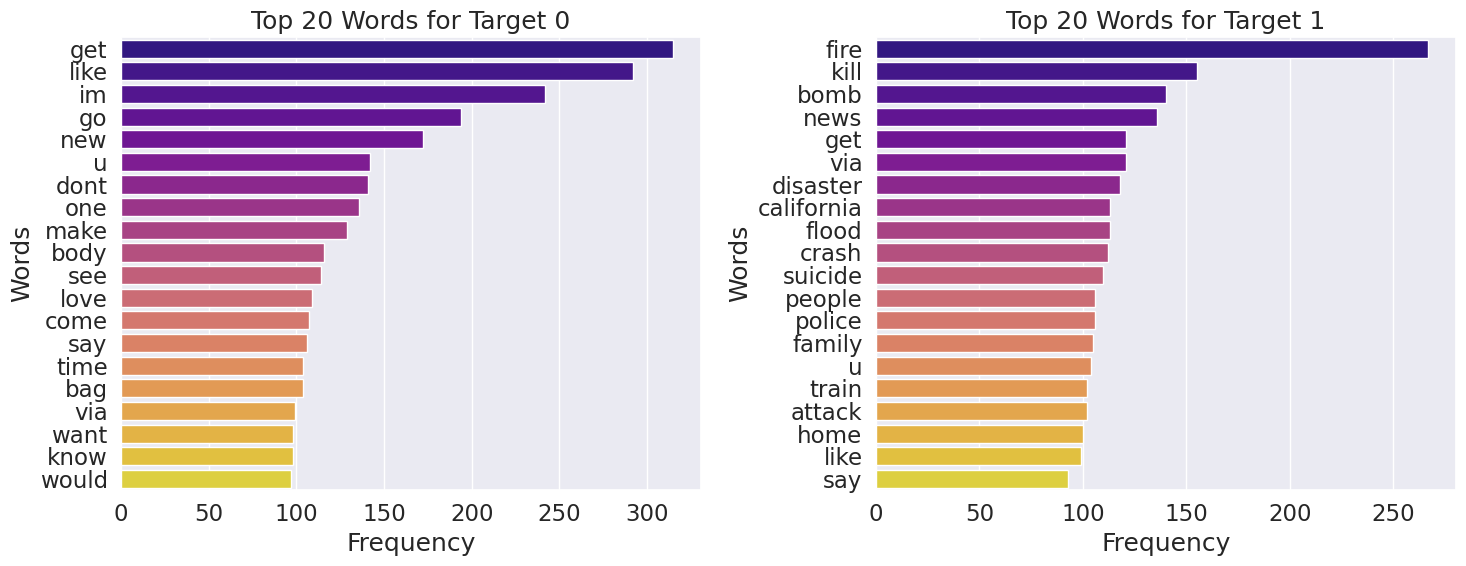

In [30]:
plt.figure(figsize=(15, 6))

# Plot for Target 0
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Words', data=df_target_0, palette='plasma')
plt.title('Top 20 Words for Target 0')

# Plot for Target 1
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Words', data=df_target_1, palette='plasma')
plt.title('Top 20 Words for Target 1')

plt.tight_layout()
plt.show()

In [31]:
lis = [
    tweet[tweet['target'] == 0]['text_clean'],
    tweet[tweet['target'] == 1]['text_clean']
]

In [32]:
def ngrams(n, title):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette='plasma', ax=j)

        axes[0].set_title('Non Disaster Tweets')
        axes[1].set_title('Disaster Tweets')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

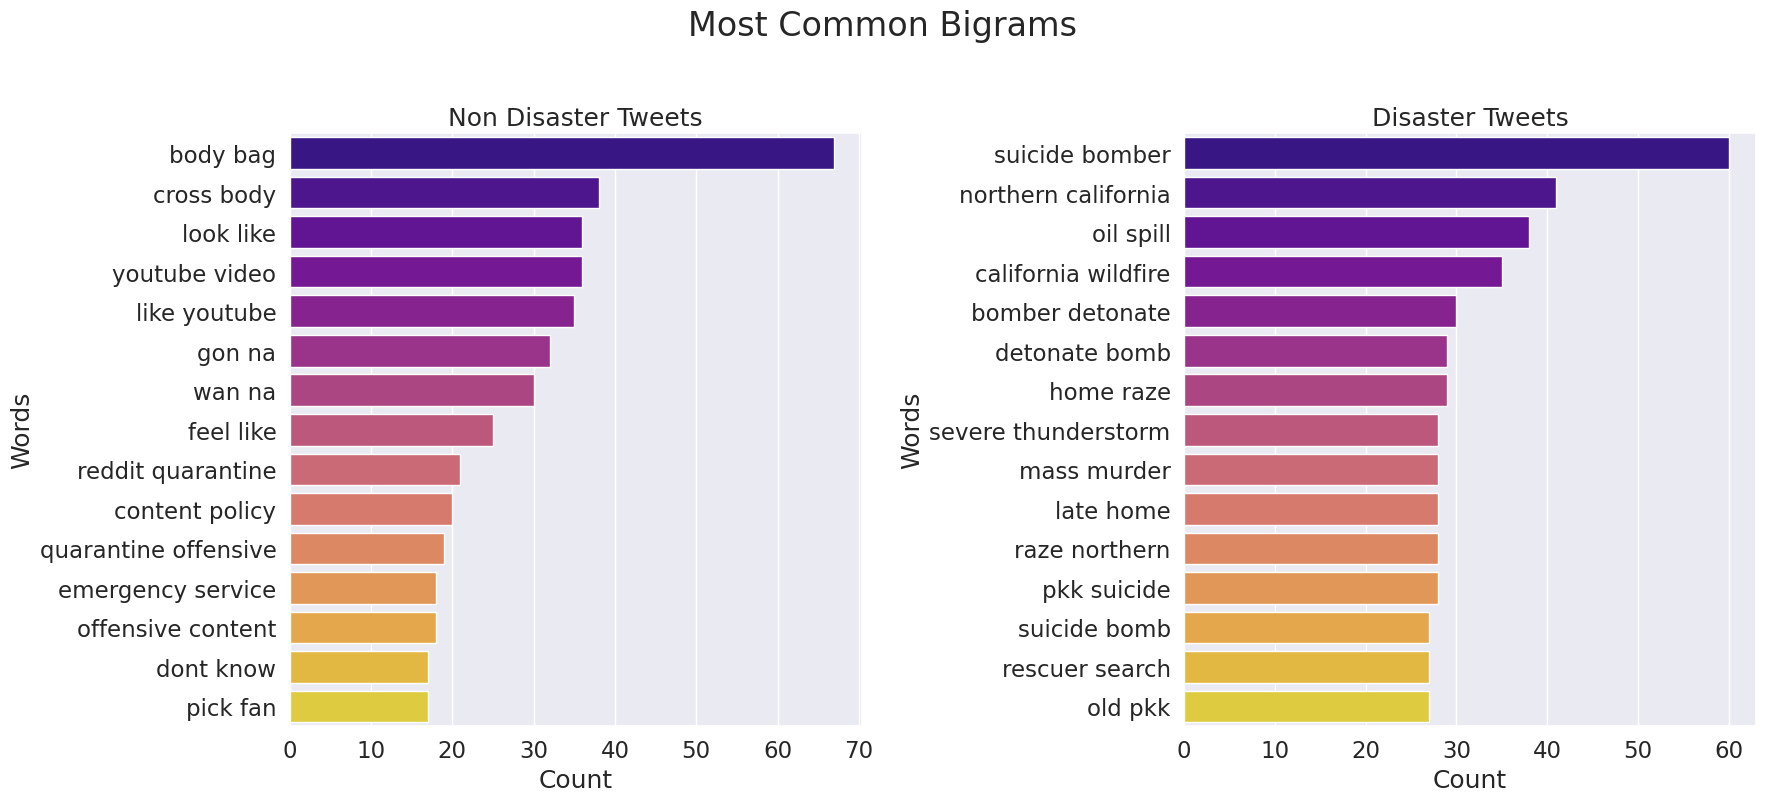

In [33]:
ngrams(2, 'Most Common Bigrams')

# WordCloud

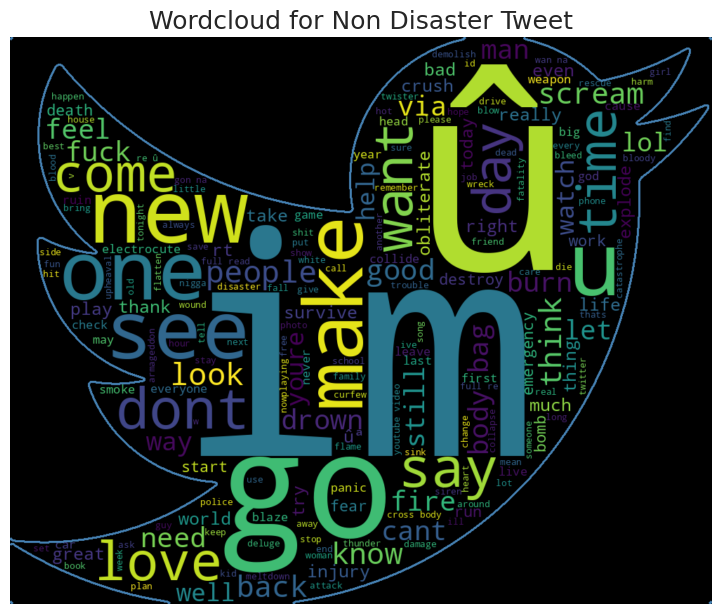

In [34]:
from wordcloud import WordCloud

mask_image = Image.open("/content/drive/My Drive/twittermask.png")
mask = np.array(mask_image)

text_0 = ' '.join(tweet0['text_clean'])
text_1 = ' '.join(tweet1['text_clean'])

# Generate the wordcloud for target=1
wordcloud_0 = WordCloud(background_color="black", contour_width=3, contour_color='steelblue', mask=mask).generate(text_0)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Non Disaster Tweet')
plt.show()

從WordCloud中，我們可以看到文本中的一些常見詞語，如 "go"、"new"、"say"、"make" 等。這些詞語都與非災難事件相關。

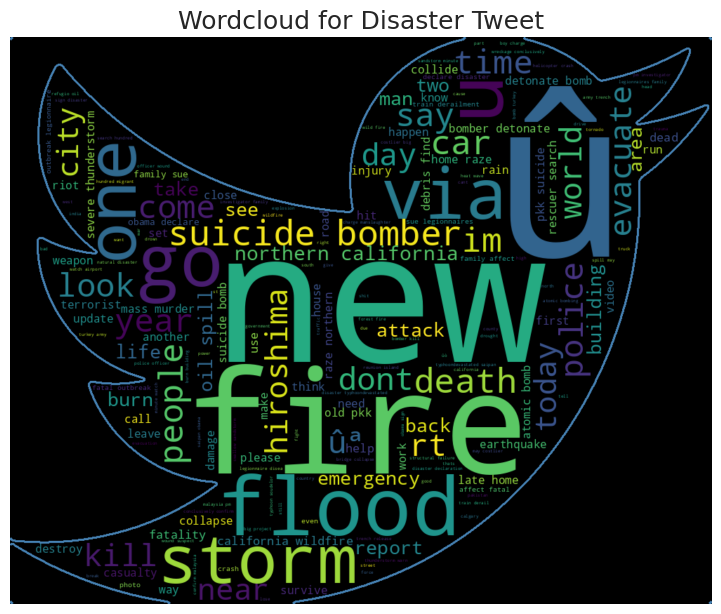

In [35]:
wordcloud_1 = WordCloud(background_color="black", contour_width=3, contour_color='steelblue', mask=mask).generate(text_1)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Disaster Tweet')
plt.show()

從WordCloud中，我們可以看到文本中的一些常見詞語，如 "fire"、"news"、"disaster"、"emergency" 等。這些詞語都與災難和緊急事件相關。

In [36]:
x = tweet['text_clean']
y = tweet['target']

print(len(x), len(y))

7613 7613


In [37]:
pip install transformers

## 資料增強

In [38]:
import nltk
from nltk.corpus import wordnet
import random,torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

nltk.download('wordnet')
def synonym_replacement(words):
    new_words = words.copy()
    random_word = random.choice(words)
    synonyms = wordnet.synsets(random_word)
    # Only replace if synonyms are found
    if synonyms:
        synonym = random.choice(synonyms).lemmas()[0].name()
        new_words[words.index(random_word)] = synonym
    return new_words

def random_insertion(words):
    new_words = words.copy()
    random_word = random.choice(words)
    synonyms = wordnet.synsets(random_word)
    # Only insert if synonyms are found
    if synonyms:
        synonym = random.choice(synonyms).lemmas()[0].name()
        new_words.insert(random.randint(0, len(new_words)-1), synonym)
    return new_words

def random_swap(words):
    new_words = words.copy()
    if len(words) > 1:  # Ensure there are at least two words for swapping
        idx1, idx2 = random.sample(range(0, len(words)), 2)
        new_words[idx1], new_words[idx2] = new_words[idx2], new_words[idx1]
    return new_words

def random_deletion(words, p=0.5):
    if len(words) == 1:  # Return if only one word is present
        return words
    new_words = []
    for word in words:
        if random.uniform(0, 1) > p:
            new_words.append(word)
    # Ensure at least one word remains
    if len(new_words) == 0:
        return [random.choice(words)]
    return new_words

def sentence_reverse(words):
    return words[::-1]



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
import random
def data_augmentation(sentence):
    words = sentence.split()
    # If the sentence is empty, return the original sentence
    if not words:
        return sentence

    choice = random.choice([
        synonym_replacement,
        random_insertion,
        random_swap,
        random_deletion
    ])
    augmented_sentence = " ".join(choice(words))
    return augmented_sentence



## Bert Encoding

In [40]:
# <!-- 數據預處理 -->
# Tokenization：使用BERT的tokenizer將文本轉換為tokens。
# Attention Masks：建立一個mask來指示哪些tokens是真實的，哪些是填充的。
# Padding：由於BERT需要固定大小的輸入，我們可能需要對較短的句子進行填充。

from transformers import BertTokenizer
import torch
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
MAX_LEN = 64

def bert_encode(data):
    input_ids = []
    attention_masks = []

    for text in data:
        text = " ".join(text.split()[:MAX_LEN-2])
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    return input_ids, attention_masks


In [41]:
input_ids, attention_masks = bert_encode(tweet['text_clean'])

In [42]:
print("Shape of input_ids:", input_ids.shape)
print("Shape of attention_masks:", attention_masks.shape)


Shape of input_ids: torch.Size([7613, 64])
Shape of attention_masks: torch.Size([7613, 64])


In [43]:
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split

# 拆分資料為訓練資料集和驗證資料集
train_df, val_df = train_test_split(tweet, test_size=0.2, random_state=42)

# 複製訓練資料集並進行資料增強
augmented_train_df = train_df.copy()
augmented_train_df['text_clean'] = augmented_train_df['text_clean'].apply(data_augmentation)

# # 將原始的訓練資料集和增強後的訓練資料集結合
train_df = pd.concat([train_df, augmented_train_df], ignore_index=True)

batch_size = 32

# 使用已有的bert_encode函數進行encoding
train_input_ids, train_attention_masks = bert_encode(train_df['text_clean'])
train_dataset = TensorDataset(train_input_ids, train_attention_masks, torch.tensor(train_df['target'].values))

val_input_ids, val_attention_masks = bert_encode(val_df['text_clean'])
val_dataset = TensorDataset(val_input_ids, val_attention_masks, torch.tensor(val_df['target'].values))

# Create DataLoader using the datasets
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)


In [44]:
len(train_dataloader)

381

In [45]:
len(val_dataloader)

48

In [46]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def evaluate(model, dataloader):
    print('')
    print('Running Validation...')
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    total_eval_f1 = 0

    for batch in dataloader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        logits = outputs[1]
        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        total_eval_loss += loss
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        total_eval_f1 += flat_f1(logits, label_ids)
    avg_val_accuracy = total_eval_accuracy / len(dataloader)
    avg_val_f1 = total_eval_f1 / len(dataloader)
    avg_val_loss = total_eval_loss / len(dataloader)
    print('Validation Loss: {0:.2f}'.format(avg_val_loss))
    print(f"Validation accuracy: {avg_val_accuracy:.2f}")
    print('F1: {0:.2f}'.format(avg_val_f1))
    return avg_val_accuracy,avg_val_f1,avg_val_loss

def flat_f1(preds, labels):

    """A function for calculating f1 scores"""

    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return f1_score(labels_flat, pred_flat)

# DistilBert

In [47]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DistilBert_model = DistilBertForSequenceClassification.from_pretrained(model_name)
DistilBert_model = DistilBert_model.to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
from transformers import AdamW, get_linear_schedule_with_warmup
optimizer = AdamW(DistilBert_model.parameters(), lr = 6e-6,eps = 1e-8,weight_decay=1e-5 )
epochs = 3
total_steps = len(train_dataloader)*epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps= total_steps)

In [49]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
training_stats = []
for epoch in range(epochs):
    print('')
    print('======== Epoch {:} / {:} ========'.format(epoch + 1, epochs))
    print('Training...')
    DistilBert_model.train()
    total_train_loss = 0

    # Training loop
    for step, batch in enumerate(train_dataloader):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        DistilBert_model.zero_grad()
        outputs = DistilBert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(DistilBert_model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss}")
    avg_val_accuracy,avg_val_f1,avg_val_loss = evaluate(DistilBert_model, val_dataloader)
    training_stats.append(
        {
            'epoch': epoch + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss.item(),
            'Valid. Accur.': avg_val_accuracy,
            'Val_F1' : avg_val_f1
        }
    )

print('')
print('Training complete!')




======== Epoch 1 / 3 ========
Training...
Average training loss: 0.49254842231592794

Running Validation...
Validation Loss: 0.42
Validation accuracy: 0.82
F1: 0.77

======== Epoch 2 / 3 ========
Training...
Average training loss: 0.39985366017017465

Running Validation...
Validation Loss: 0.42
Validation accuracy: 0.83
F1: 0.79

======== Epoch 3 / 3 ========
Training...
Average training loss: 0.36696531347871764

Running Validation...
Validation Loss: 0.42
Validation accuracy: 0.83
F1: 0.79

Training complete!


In [50]:
pd.set_option('display.precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
display(df_stats)

,Training Loss,Valid. Loss,Valid. Accur.,Val_F1
epoch,,,,
1,0.49,0.42,0.82,0.77
2,0.40,0.42,0.83,0.79
3,0.37,0.42,0.83,0.79


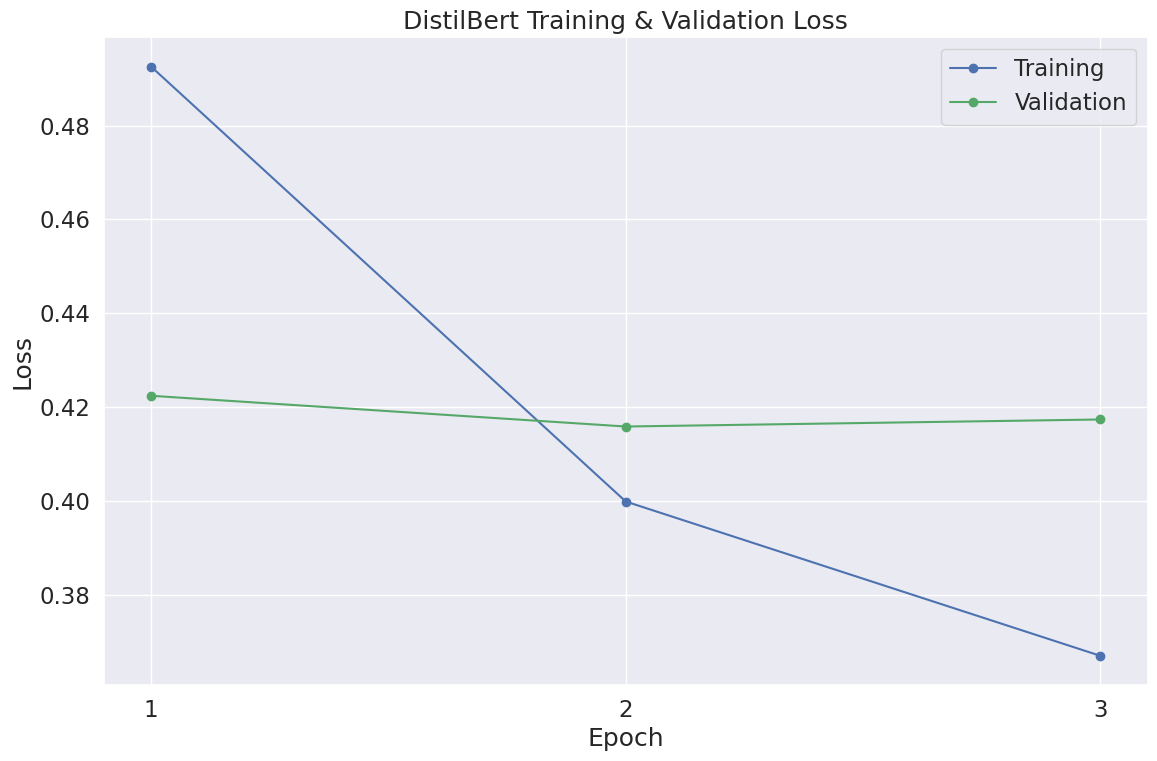

In [51]:
fig, axes = plt.subplots(figsize=(12,8))
plt.plot(df_stats['Training Loss'], 'b-o', label='Training')
plt.plot(df_stats['Valid. Loss'], 'g-o', label='Validation')

plt.title('DistilBert Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.xticks([1, 2, 3])

plt.show()

In [52]:
evaluate(DistilBert_model, val_dataloader)


Running Validation...
Validation Loss: 0.42
Validation accuracy: 0.83
F1: 0.79


(0.830249451754386, 0.7916853097135749, tensor(0.4173, device='cuda:0'))

# Bert Model

In [53]:
from transformers import BertForSequenceClassification
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained(
    'bert-large-uncased',
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False
)
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
from transformers import AdamW, get_linear_schedule_with_warmup
optimizer = AdamW(model.parameters(), lr = 6e-6,  eps = 1e-8,weight_decay=1e-5)
epochs = 2
total_steps = len(train_dataloader)*epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps= total_steps)

In [55]:
# Training
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler,EarlyStopping
training_stats = []
for epoch in range(epochs):
    print('')
    print('======== Epoch {:} / {:} ========'.format(epoch + 1, epochs))
    print('Training...')
    model.train()
    total_train_loss = 0
    for step, batch in enumerate(train_dataloader):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        model.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss}")
    # After each epoch, evaluate the model on your validation set
    avg_val_accuracy,avg_val_f1,avg_val_loss = evaluate(model, val_dataloader)
    training_stats.append(
        {
            'epoch': epoch + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss.item(),
            'Valid. Accur.': avg_val_accuracy,
            'Val_F1' : avg_val_f1
        }
    )

print('')
print('Training complete!')



======== Epoch 1 / 2 ========
Training...
Average training loss: 0.0

Running Validation...
Validation Loss: 0.43
Validation accuracy: 0.83
F1: 0.79

======== Epoch 2 / 2 ========
Training...
Average training loss: 0.0

Running Validation...
Validation Loss: 0.42
Validation accuracy: 0.83
F1: 0.79

Training complete!


In [56]:
pd.set_option('display.precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
display(df_stats)

,Training Loss,Valid. Loss,Valid. Accur.,Val_F1
epoch,,,,
1,0.0,0.43,0.83,0.79
2,0.0,0.42,0.83,0.79


Text(0, 0.5, 'Loss')

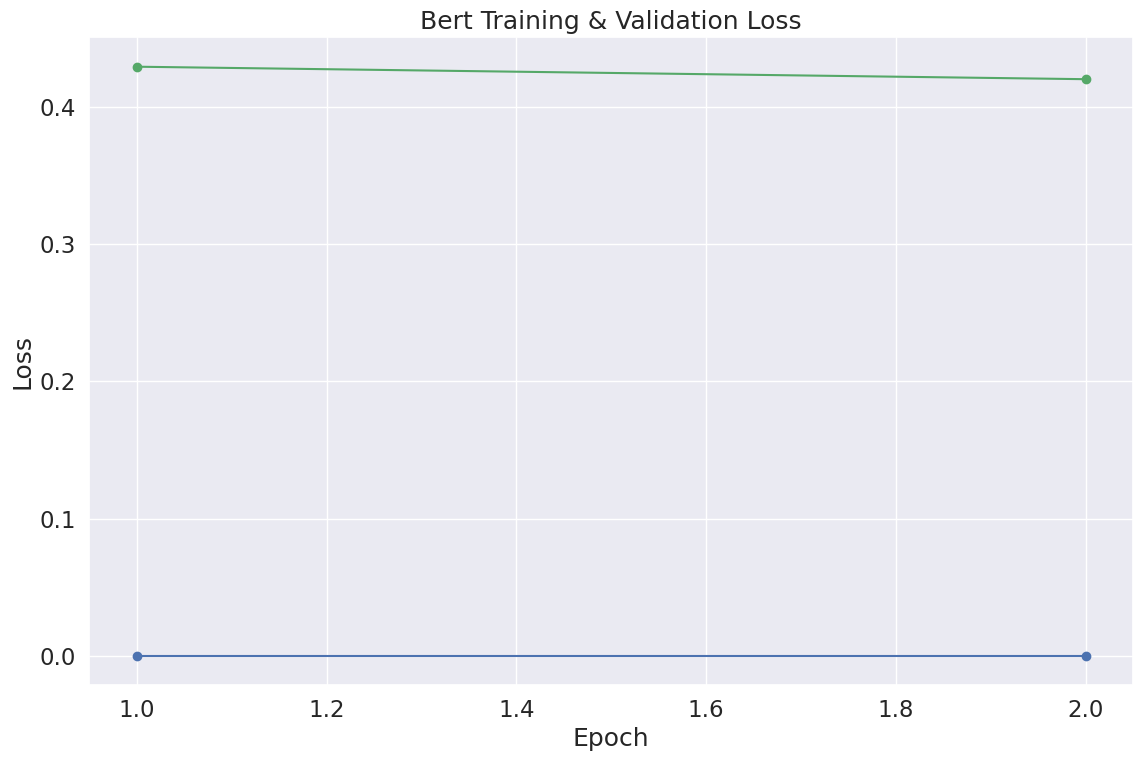

In [57]:
fig, axes = plt.subplots(figsize=(12,8))
plt.plot(df_stats['Training Loss'], 'b-o', label='Training')
plt.plot(df_stats['Valid. Loss'], 'g-o', label='Validation')

plt.title('Bert Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [58]:
evaluate(model, val_dataloader)


Running Validation...
Validation Loss: 0.42
Validation accuracy: 0.83
F1: 0.79


(0.8319627192982456, 0.7940124709194869, tensor(0.4201, device='cuda:0'))

In [65]:
test =pd.read_csv('/content/drive/My Drive/test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [66]:
test['text_clean'] = test['text'].apply(clean_text)
test['text_clean'] = test['text_clean'].apply(preprocess_data)

In [61]:
test.head()

,id,keyword,location,text,text_clean
0,0,NaN,NaN,Just happened a terrible car crash,happen terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese flee across street...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse light spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


In [67]:
# test= pd.read_csv("/Users/yankesswang/Downloads/nlp-getting-started/test.csv")
# test['text_clean'] = test['text'].apply(preprocess_data)
test_input_ids, test_attention_masks = bert_encode(test['text_clean'])

test_dataset = TensorDataset(test_input_ids, test_attention_masks)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=32)


DistilBert_model.eval()

predictions = []
for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask = batch

    with torch.no_grad():
        outputs= DistilBert_model(b_input_ids,attention_mask=b_input_mask)
    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)

# Flatten the predictions list
flat_predictions = [item for sublist in predictions for item in sublist]
predicted_labels = np.argmax(flat_predictions, axis=1).flatten()

# 4. 根據需要保存或使用預測結果
test['target'] = predicted_labels
test.drop(['text_clean','keyword', 'location', 'text'], axis=1, inplace=True)
# test.to_csv('/Users/yankesswang/Downloads/nlp_disaster2.csv', index=False)

In [63]:
test.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [68]:
from google.colab import files
path = 'disaster_submission.csv'
test.to_csv(path, index=False)

files.download(path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>